<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/blob/main/Chapter02/Detectron2-Chapter02-Keypoint%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

Should change runtime to have GPU Hardware accelerator: Runtime > Change runtime > Hardware accelerator: GPU.

In [ ]:
import torch
print(torch.__version__)

1.12.1+cu113


In [ ]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-xmmjqhzl
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-xmmjqhzl
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 151 kB 69.5 MB/s 
     |████████████████████████████████| 1.4 MB 65.0 MB/s 
     |████████████████████████████████| 509 kB 66.1 MB/s 
     |████████████████████████████████| 248 kB 70.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 96 kB 5.8 MB/s 
     |████████████████████████████████| 843 kB 67.9 MB/s 
     |████████████████████████████████| 117 kB 76.0 MB/s 
  Created whee

# Get a predictor

In [ ]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
# Suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# Select a model
config_file = "COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"
checkpoint_url = "COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"
# Create a configuration file
cfg = get_cfg()
config_file = model_zoo.get_config_file(config_file)
cfg.merge_from_file(config_file)
# Download weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
score_thresh_test = 0.95
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(cfg)

model_final_5ad38f.pkl: 491MB [00:22, 21.9MB/s]                           


# Perform inference

In [ ]:
!wget https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg

In [ ]:
import cv2
input_url = "input.jpeg"
img = cv2.imread(input_url)
output = predictor(img)

In [ ]:
print(output)

{'instances': Instances(num_instances=4, image_height=720, image_width=960, fields=[pred_boxes: Boxes(tensor([[499.1683, 338.0172, 691.8182, 637.8489],
        [297.4706, 189.8508, 438.7814, 652.3914],
        [421.5543, 255.9177, 503.1716, 616.7637],
        [449.5224, 393.6401, 554.4903, 675.1277]], device='cuda:0')), scores: tensor([0.9990, 0.9985, 0.9933, 0.9913], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0'), pred_keypoints: tensor([[[5.2471e+02, 3.6899e+02, 8.5649e-01],
         [5.2919e+02, 3.6091e+02, 8.8372e-01],
         [5.1575e+02, 3.6540e+02, 1.3091e+00],
         [5.3904e+02, 3.6270e+02, 5.1757e-01],
         [5.0947e+02, 3.7437e+02, 4.6024e-01],
         [5.6413e+02, 3.8694e+02, 2.3579e-01],
         [5.1933e+02, 4.0849e+02, 7.4826e-02],
         [6.0356e+02, 3.9592e+02, 5.2975e-01],
         [5.1037e+02, 4.2913e+02, 3.4908e-02],
         [6.4746e+02, 4.0759e+02, 4.6894e-01],
         [5.5159e+02, 4.7312e+02, 2.0544e-01],
         [6.0266e+02, 4.5

# Visualization

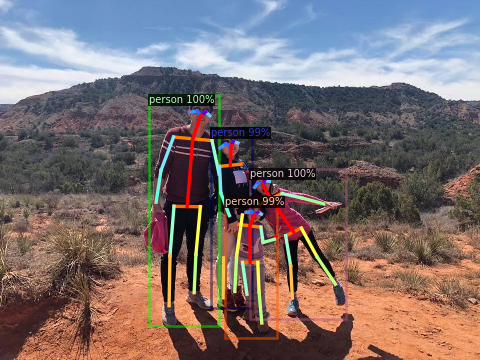

In [ ]:
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
v = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
instances = output["instances"].to("cpu")
annotated_img = v.draw_instance_predictions(instances)
cv2_imshow(annotated_img.get_image()[:, :, ::-1])